# **Assignment 1**
### 10 Points

---



This lab will help you understand the concept of implementing an MLP using  backpropagation algorithm. You are free to use any ML library such as Tensorflow, PyTorch or any other. However, this lab is supported using PyTorch.

1. Prepare the MNIST dataset. [1 point]

    1.1 Download the training set and test set from `torchvision.datasets`
    
    1.2 Set a batch size and push the training set and test set to dataloaders.
   
2. Compute the basic statistics of the training set that includes shape, min, max, mean, variance. You can use either `torch` or `numpy`. [1 point]

3. Prepare model.

    3.1 Define your own MLP network class from `nn.Module`. [1 point]
    
    3.2 Define your optimizer and loss function. [1 point]

4. Write a function that can train the model on training set and output the perfomance of the model on testing set. [4 points]

    4.1 The function should be able to train the model for N epochs and validate the model on the test set after each epoch.  
    4.2 The function should print the loss and accuracy on the training set and test set after each epoch.
    
    4.3 The function should store and return lists containing the loss and accuracy history on the training set and test set, so we can print the plot of accuracy and loss. 

5. Train the model for N epochs (N is any integer chosen by you) and print the loss and accuracy for each epoch and for both training set and test set. [1 point]

6. Visualize the accuracy and loss with respect to each epoch [1 point]
    
    6.1 One plot that contains accuracy curves for training set and testing set.    
    6.2 One plot that contains loss curves for both sets.

Important Reference: To be able to understand and code Deep Learning Models that are easy and ready for production, one should seriously refer to the documentation and tutorial of PyTorch (https://pytorch.org/tutorials/).

# MNIST Images - Our best friend!

The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. 

It consists of 60,000 training images and 10,000 testing images.

Original source of MNIST Dataset: (http://yann.lecun.com/exdb/mnist/). The link is just for reference, you don't need to download anything from the link.

![alt text](https://cdn-images-1.medium.com/max/1200/1*9Mjoc_J0JR294YwHGXwCeg.jpeg)

## Necesary libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim
from torchvision.transforms import ToTensor

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
import time

## Download the MNIST train and test set [1 point]
Using the torch.utils.data DataLoader, we shuffle the data and set the batch size to be 256. It is very important for everyone to focus on how the dataloader works. Please refer to the documentation.

In [2]:
"YOUR CODE"
batch_size = 256

"YOUR CODE" # Load the training data
train = MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

"YOUR CODE" # Load the test data
test = MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

"YOUR CODE" # Push the training data to the dataloader
train_loader = dataloader.DataLoader(train, batch_size= batch_size, shuffle=True)

"YOUR CODE" # Push the test data to the dataloader
test_loader = dataloader.DataLoader(test, batch_size= batch_size, shuffle=True)

cuda = torch.cuda.is_available() # Check if GPU CUDA is available

## Compute basic data statistics [1 point]
It is always important to know the shape of the data, as well as the min/max and mean/variance. Print all the values. You may use the following functions in pytorch:

Shape (train_data.shape), min (torch.min), max (torch.max), mean (torch.mean), variance (torch.var), standard deviation (torch.std)

In [3]:
train_data = train.train_data

"YOUR CODE"
shape = train_data.size()
print('Train data shape: ',shape)

"YOUR CODE"# Calculate the mean of the training data
mean = torch.mean(train_data.float())
print('Mean of all the pixels: ',mean)

"YOUR CODE" # Calculate the maximum value of the training data
max_value = torch.max(train_data.float())
print('Maximum of all the pixels: ',max_value)

"YOUR CODE" # Calculate the minimum value of the training data
min_value = torch.min(train_data.float())
print('Minimum of all the pixels: ',min_value)

"YOUR CODE" # Calculate the variance of the training data
Variance = torch.var(train_data.float())
print('Variance of all the pixels: ',Variance)

Train data shape:  torch.Size([60000, 28, 28])
Mean of all the pixels:  tensor(33.3184)
Maximum of all the pixels:  tensor(255.)
Minimum of all the pixels:  tensor(0.)
Variance of all the pixels:  tensor(6172.8506)


/home/dhun97/.local/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Visualize a few training samples
Using the matplotlib.pyplot library, we can visualize our input data.


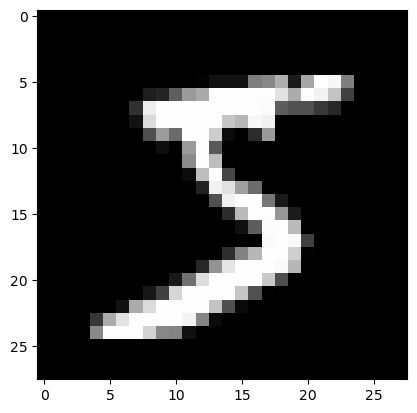

In [4]:
# Visualize a training instance with matplotlib
plt.imshow(train.train_data.cpu().numpy()[0], cmap='gray')

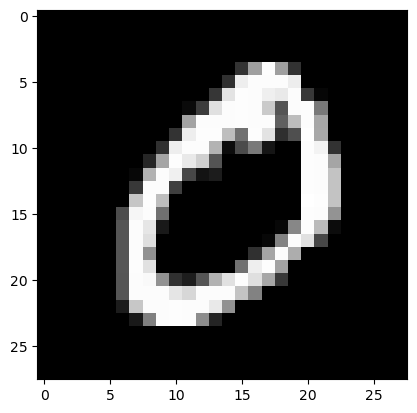

In [5]:
plt.imshow(train.train_data.cpu().numpy()[1], cmap='gray')

## Defining a Neural Network Model 



## Create the model and define the loss and optimizer [2 points]

Define your model using the torch.nn.Module class.

You create an instance of the Simple_MLP model by passing it a list of layer sizes. The input layer contains 28*28 = 784 neurons. You may define hidden layers of different hidden dimension, and output will be the class probabilities for each of the 10 digits (0-9).

How many neurons will be there in the output layer?

This is a classification task, I recommend you use Cross Entropy Loss (It is your error function or divergence function). We define our criterion using the torch.nn.CrossEntropyLoss.

In order to train our network, we use the torch.optim.SGD optimizer. You may use the optimizer **Adam**.

In [6]:
# Please complete the code below. Hint: Each comment is a line of code

# Create an instance of Simple MLP model
# Specify the activation function to use

class Simple_MLP(nn.Module):
    def __init__(self):
        super(Simple_MLP, self).__init__()
        "YOUR CODE"
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        "YOUR CODE"
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# Define your Loss function
"YOUR CODE"
criterion = nn.CrossEntropyLoss()

# Intilialize and print the model
model = Simple_MLP()
print(model)

# Choose an optimizer for the model parameters (ex. optimizer = optim.Adam(model.parameters()))
"YOUR CODE"
optimizer = optim.Adam(model.parameters(), lr=0.001)


# device is the hardware you are using (CPU or GPU)
device = torch.device("cuda" if cuda else "cpu")


Simple_MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


## Complete the below function that will train the network [4 points]
### The function should be able to train the model for N epochs and validate the model on the test set after each epoch. 
### The function should print the loss and accuracy on the training set and test set after each epoch. 
### The function should store and return lists containing the loss and accuracy history on the training set and test set, so we can print the plot of accuracy and loss. 



In [7]:
def train_model(train_loader, test_loader, model, loss_fn, optimizer, num_epochs):
    "YOUR CODE"
    train_acc_history = []
    valid_acc_history = []
    train_loss_history = []
    valid_loss_history = []
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}")
        
        # Training phase
        model.train()
        train_acc = []
        train_loss = [] 
        for batch, (X, y) in enumerate(train_loader):
          # Compute prediction and loss
          pred = model(X)
          loss = loss_fn(pred, y)
        
          # Backpropagation
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()

          # Calculate accuracy
          _, predicted = torch.max(pred.data, 1)
          correct = (predicted == y).sum().item()
          acc = 100 * correct / len(y)
          train_acc.append(acc)
          train_loss.append(loss.item())
        
        train_acc_history.append(np.mean(train_acc))
        train_loss_history.append(np.mean(train_loss))
        
        # Evaluation phase
        with torch.no_grad():
          model.eval()
          test_loss = []
          test_acc = []
          correct = 0
          for data, target in test_loader:
            pred = model(data)
            # Calculate accuracy
            _, predicted = torch.max(pred.data, 1)
            correct += (predicted == target).sum().item()
            test_loss.append(loss_fn(pred, target).item())
        valid_acc_history.append(100 * correct / len(test_loader.dataset))
        valid_loss_history.append(np.mean(test_loss))
        
        # Print epoch results
        print(f"Training Accuracy: {train_acc_history[epoch]:.3f}, Validation Accuracy: {valid_acc_history[epoch]:.3f}")
        print(f"Training Loss: {train_loss_history[epoch]:.3f}, Validation Loss: {valid_loss_history[epoch]:.3f}")
        print('\n')
        print("-------------------------------")

    return [train_acc_history, valid_acc_history, train_loss_history, valid_loss_history]

## Train the model for N epochs [1 point]
Train and test your network in a loop, while keeping track of the **losses and accuracy**.   

In [8]:
# Write your piece of code to run train and test the network for N epochs.  
n_epochs = 20
train_acc_list,valid_acc_list,train_loss_list,valid_loss_list = train_model(train_loader, test_loader, model, criterion, optimizer, n_epochs)

Epoch 1
Training Accuracy: 89.448, Validation Accuracy: 94.590
Training Loss: 0.389, Validation Loss: 0.185


-------------------------------
Epoch 2
Training Accuracy: 95.772, Validation Accuracy: 96.600
Training Loss: 0.142, Validation Loss: 0.114


-------------------------------
Epoch 3
Training Accuracy: 97.190, Validation Accuracy: 97.300
Training Loss: 0.094, Validation Loss: 0.089


-------------------------------
Epoch 4
Training Accuracy: 97.958, Validation Accuracy: 97.450
Training Loss: 0.068, Validation Loss: 0.086


-------------------------------
Epoch 5
Training Accuracy: 98.426, Validation Accuracy: 97.720
Training Loss: 0.051, Validation Loss: 0.069


-------------------------------
Epoch 6
Training Accuracy: 98.812, Validation Accuracy: 97.870
Training Loss: 0.040, Validation Loss: 0.075


-------------------------------
Epoch 7
Training Accuracy: 99.099, Validation Accuracy: 98.090
Training Loss: 0.029, Validation Loss: 0.062


-------------------------------
Epoch 

## Visualize the accuracy and loss with respect to each epoch [1 point]

Draw a graph for Training Loss percentage with respect to the number of epochs. 

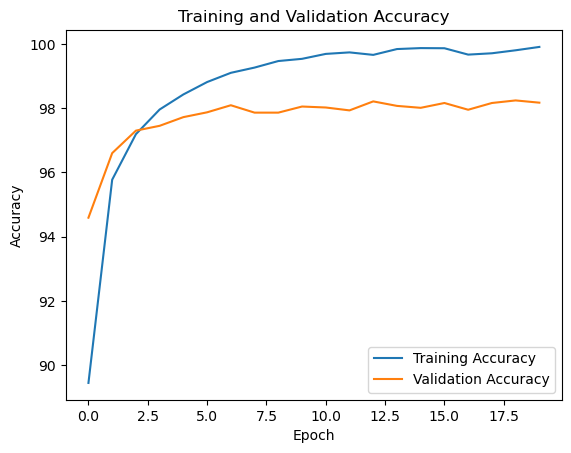

In [9]:
# Insert your code here
# plot the train accuray and validation accuracy in the same plot 
x = range(n_epochs)
plt.plot(x, train_acc_list, label='Training Accuracy')
plt.plot(x, valid_acc_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Draw a graph for Testing Loss percentage with respect to number of epochs.

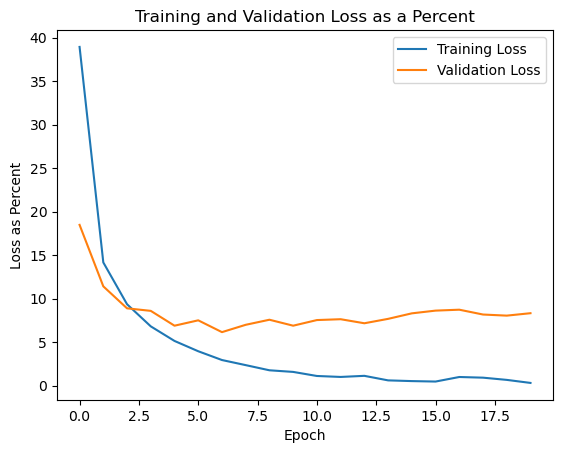

In [10]:
# plot the train loss and validation loss in the same plot 
"YOUR CODE"

x = range(len(train_loss_list))
plt.plot(x, [x * 100 for x in train_loss_list], label='Training Loss')
plt.plot(x, [x * 100 for x in valid_loss_list], label='Validation Loss')
plt.title('Training and Validation Loss as a Percent')
plt.xlabel('Epoch')
plt.ylabel('Loss as Percent')
plt.legend()

plt.show()